In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
fire = pd.read_csv('/content/drive/MyDrive/UnemploymentProject/CleanDatasets/merged_data.csv')
old_fire_csv = pd.read_csv("/content/drive/MyDrive/WildfireProject(Outdated)/FireAndClimateFinal.csv")


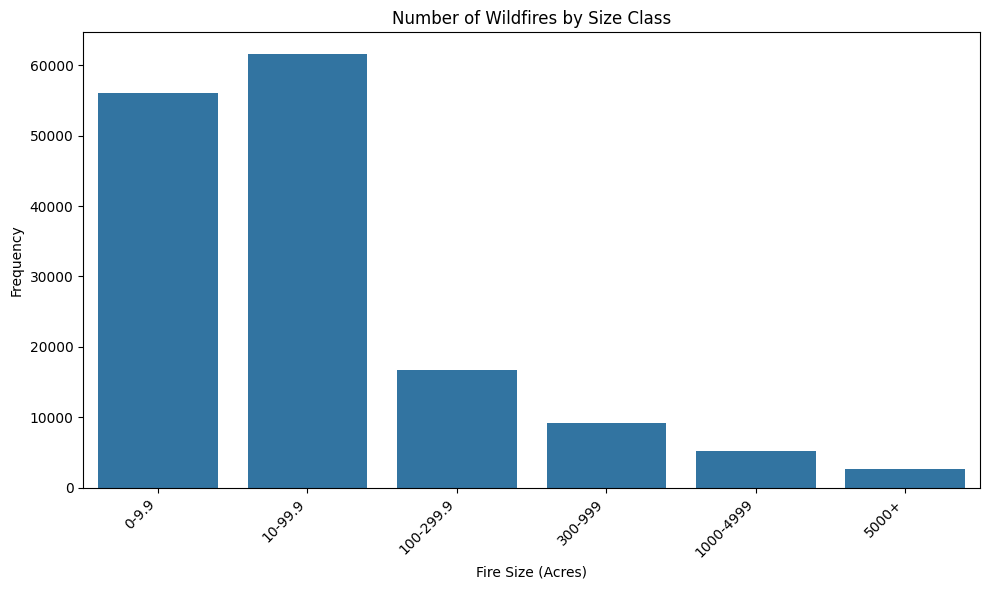

In [3]:
bins = [0, 9.9, 99.9, 299.9, 999, 4999, float('inf')]
labels = ['0-9.9', '10-99.9', '100-299.9', '300-999', '1000-4999', '5000+']

fire['Fire_Size_Category'] = pd.cut(fire['Fire_Size'], bins=bins, labels=labels, right=False)

fire_size_counts = fire['Fire_Size_Category'].value_counts()

plt.figure(figsize=(10, 6))
sns.barplot(x=fire_size_counts.index, y=fire_size_counts.values)
plt.xlabel('Fire Size (Acres)')
plt.ylabel('Frequency')
plt.title('Number of Wildfires by Size Class')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

<ipython-input-4-6fb627ab27ba>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  arson_fires['Fire_Size_Category'] = pd.cut(arson_fires['Fire_Size'], bins=bins, labels=labels, right=False)


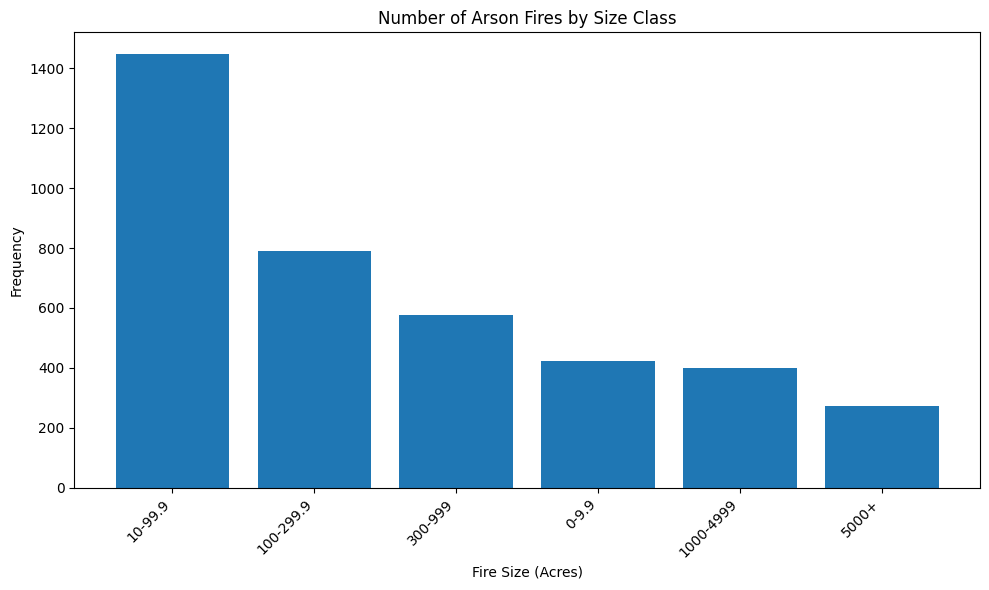

In [4]:
arson_fires = old_fire_csv[old_fire_csv["Cause_Arson"] == 1]

bins = [0, 9.9, 99.9, 299.9, 999, 4999, float('inf')]
labels = ['0-9.9', '10-99.9', '100-299.9', '300-999', '1000-4999', '5000+']

arson_fires['Fire_Size_Category'] = pd.cut(arson_fires['Fire_Size'], bins=bins, labels=labels, right=False)

arson_fire_size_counts = arson_fires['Fire_Size_Category'].value_counts()
plt.figure(figsize=(10, 6))
plt.bar(arson_fire_size_counts.index, arson_fire_size_counts.values)
plt.xlabel('Fire Size (Acres)')
plt.ylabel('Frequency')
plt.title('Number of Arson Fires by Size Class')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [5]:
fire_copy = fire.copy()

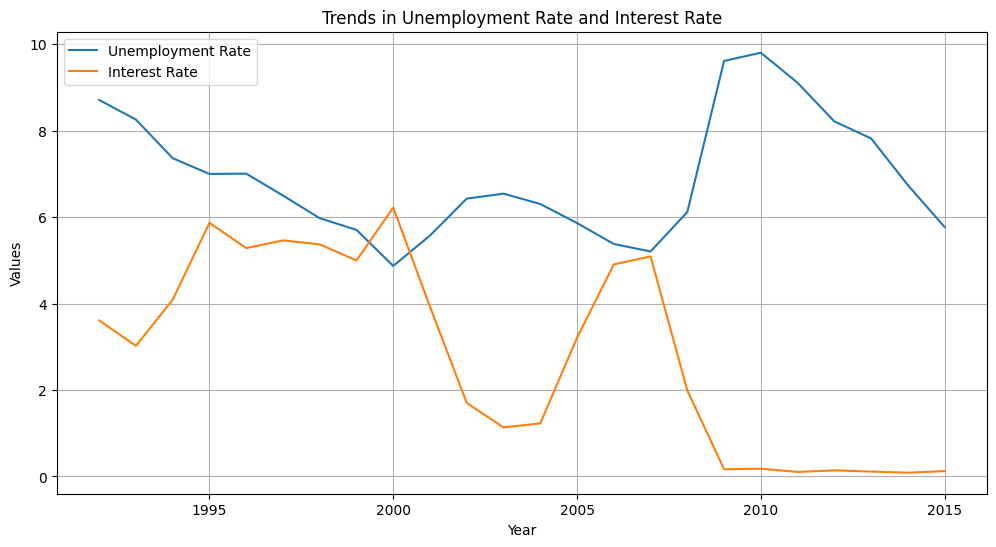

In [6]:
# Ensuring correct modules are imported
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Interest Rate and CPI Trends with Unemployment
plt.figure(figsize=(12, 6))
df_grouped = fire_copy.groupby(['Year']).agg({'Rate': 'mean', 'Interest Rate': 'mean'}).reset_index()
plt.plot(df_grouped['Year'], df_grouped['Rate'], label='Unemployment Rate')
plt.plot(df_grouped['Year'], df_grouped['Interest Rate'], label='Interest Rate')
plt.title('Trends in Unemployment Rate and Interest Rate')
plt.xlabel('Year')
plt.ylabel('Values')
plt.legend()
plt.grid()
plt.show()

**DATA ANALYSIS WITH BIN5 DATA**

In [7]:
bin5 = pd.read_csv('/content/drive/MyDrive/UnemploymentProject/CleanDatasets/bin_5_cleaned_future_rates.csv')
bin5.head()

,Month,Year,State,County,Fire_Size,Rate,Number of Employees,CPI,Interest Rate,NumWorkStoppages,...,Rate_6M_Later,Rate_7M_Later,Rate_8M_Later,Rate_9M_Later,Rate_10M_Later,Rate_11M_Later,Rate_12M_Later,Rate_1M_Previous,Rate_2M_Previous,Rate_3M_Previous
0,4,1992,MS,Attala,159.0,12.8,108331.0,139.5,3.73,35,...,7.7,10.0,9.9,10.2,10.9,8.2,10.3,14.4,12.0,11.7
1,4,1992,MS,Jackson,356.0,6.6,108331.0,139.5,3.73,35,...,5.5,6.7,6.4,5.9,5.4,5.3,6.3,6.6,6.9,7.1
2,4,1992,MS,Harrison,979.0,7.3,108331.0,139.5,3.73,35,...,4.2,5.1,4.9,5.0,7.4,7.2,7.5,7.3,7.5,7.6
3,4,1992,MS,Hancock,146.0,7.1,108331.0,139.5,3.73,35,...,5.3,5.3,5.8,7.1,6.6,6.4,5.8,7.4,7.3,7.5
4,4,1992,MS,Forrest,257.5,6.3,108331.0,139.5,3.73,35,...,4.6,4.5,4.2,4.0,4.8,5.2,3.9,7.0,7.2,6.7


In [8]:
bin5.columns.to_list()

['Month',
 'Year',
 'State',
 'County',
 'Fire_Size',
 'Rate',
 'Number of Employees',
 'CPI',
 'Interest Rate',
 'NumWorkStoppages',
 'NumWorkersInStoppages',
 'WorkStoppagesTotalDays',
 'Log_Fire_Size',
 'Log10_Fire_Size',
 'Sqrt_Fire_Size',
 'Crt_Fire_Size',
 'Log_Fire_Size_Bin',
 'Date',
 'Rate_1M_Later',
 'Rate_2M_Later',
 'Rate_3M_Later',
 'Rate_4M_Later',
 'Rate_5M_Later',
 'Rate_6M_Later',
 'Rate_7M_Later',
 'Rate_8M_Later',
 'Rate_9M_Later',
 'Rate_10M_Later',
 'Rate_11M_Later',
 'Rate_12M_Later',
 'Rate_1M_Previous',
 'Rate_2M_Previous',
 'Rate_3M_Previous']

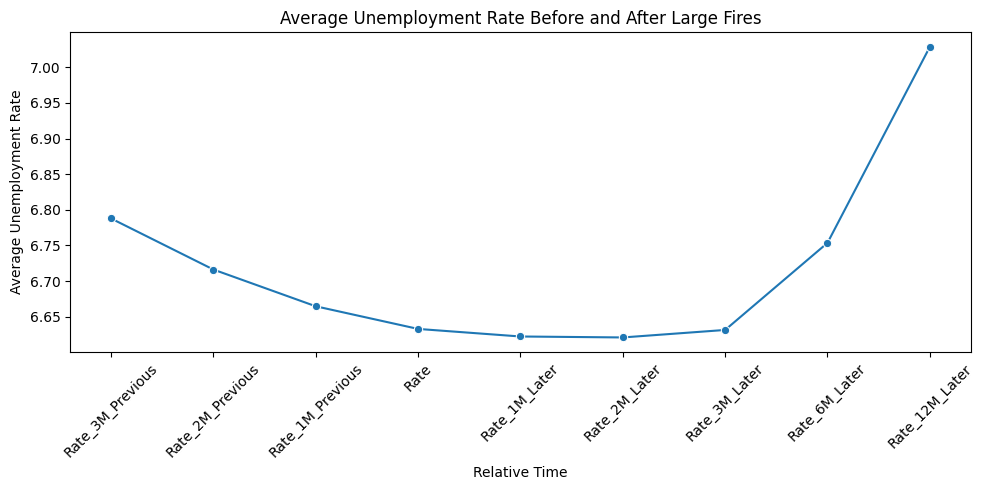

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

past_and_future_cols = ['Rate_3M_Previous','Rate_2M_Previous','Rate_1M_Previous','Rate','Rate_1M_Later','Rate_2M_Later','Rate_3M_Later','Rate_6M_Later','Rate_12M_Later']
profile_data = bin5[past_and_future_cols].mean()

profile_data_df = profile_data.reset_index()
profile_data_df.columns = ['Time', 'AvgRate']

# Sort by a logical timeline: previous, current, future
time_order = ['Rate_3M_Previous','Rate_2M_Previous','Rate_1M_Previous','Rate','Rate_1M_Later','Rate_2M_Later','Rate_3M_Later','Rate_6M_Later','Rate_12M_Later']
profile_data_df['Time'] = pd.Categorical(profile_data_df['Time'], categories=time_order, ordered=True)
profile_data_df.sort_values('Time', inplace=True)

plt.figure(figsize=(10,5))
sns.lineplot(data=profile_data_df, x='Time', y='AvgRate', marker='o')
plt.title('Average Unemployment Rate Before and After Large Fires')
plt.xlabel('Relative Time')
plt.ylabel('Average Unemployment Rate')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [11]:
# This is a visualization from the previous methodology for climate and fire size.
import plotly.express as px
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
import pandas as pd

fcu = pd.read_csv('/content/drive/MyDrive/WildfireProject(Outdated)/FireClimateUnemployment.csv')
fcu['Main_Climate'] = fcu[['Main_Climate_arid', 'Main_Climate_equitorial', 'Main_Climate_snow', 'Main_Climate_warm temperature']].idxmax(axis=1)
fcu['Temperature_Type'] = fcu[['Temperature_cold arid', 'Temperature_cool summer', 'Temperature_hot arid', 'Temperature_hot summer', 'Temperature_warm summer']].idxmax(axis=1)
fcu['Precipitation_Type'] = fcu[['Precipitation_desert', 'Precipitation_fully humid', 'Precipitation_steppe', 'Precipitation_summer dry', 'Precipitation_winter dry']].idxmax(axis=1)

df_grouped = fcu.groupby(['Main_Climate', 'Precipitation_Type', 'Temperature_Type'], dropna=False)['Fire_Size'].mean().reset_index()

main_climates = df_grouped['Main_Climate'].unique()
precip_types = df_grouped['Precipitation_Type'].unique()
temp_types = df_grouped['Temperature_Type'].unique()

main_climate_to_num = {cat: i for i, cat in enumerate(main_climates)}
precip_to_num = {cat: i for i, cat in enumerate(precip_types)}
temp_to_num = {cat: i for i, cat in enumerate(temp_types)}

df_grouped['x'] = df_grouped['Precipitation_Type'].map(precip_to_num)
df_grouped['y'] = df_grouped['Main_Climate'].map(main_climate_to_num)
df_grouped['z'] = df_grouped['Temperature_Type'].map(temp_to_num)
df_plot = df_grouped.copy()

df_plot = df_plot.rename(columns={
    'Main_Climate': 'mc',
    'Precipitation_Type': 'p',
    'Temperature_Type': 't'
})

df_plot['mc'] = df_plot['mc'].str.replace('Main_Climate_', 'mc_', regex=False)
df_plot['p'] = df_plot['p'].str.replace('Precipitation_', 'p_', regex=False)
df_plot['t'] = df_plot['t'].str.replace('Temperature_', 't_', regex=False)

fig = px.scatter_3d(
    df_plot,
    x='p',
    y='mc',
    z='t',
    color='Fire_Size',
    size='Fire_Size',
    hover_data=['Fire_Size', 'mc', 'p', 't'],
    color_continuous_scale='Reds'
)

fig.update_layout(
    scene=dict(
        xaxis_title='',
        yaxis_title='',
        zaxis_title=''
    ),
    title='3D Scatter: Average Fire Size by p, mc, and t'
)

fig.show()